In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors, kstest_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Vivino sentiment dataset

In [2]:
vivino_df = pd.read_csv('../input/wine-preferences/vivino_sentiment1_100.csv')
vivino_df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Year,Wine ID,Wine Name,Country,Structure,Style,User Rating,Note,CreatedAt,Wine Type,sentiment
0,0,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,"Wow, this one was a surprise for being so youn...",2018-04-20T20:11:25.000Z,1.0,1
1,1,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,For the price seems quite good. A little too o...,2019-04-01T03:24:42.000Z,1.0,1
2,2,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,Lots of oak with dry qualities like you’d expe...,2019-08-10T20:43:25.000Z,1.0,0
3,3,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,"Fantastic Malbec, can’t really go wrong here \...",2019-02-03T01:20:48.000Z,1.0,1
4,4,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,"Nice pemegranate color. Medium acidity, medium...",2019-05-30T15:45:16.000Z,1.0,1


In [3]:
def extract_structure(x, key):
    try:
        return ast.literal_eval(x.replace("'", "\""))[key]
    except:
        return None

In [4]:
vivino_df['acidity'] = vivino_df['Structure'].apply(lambda x: extract_structure(x, 'acidity'))
vivino_df['intensity'] = vivino_df['Structure'].apply(lambda x: extract_structure(x, 'intensity'))
vivino_df['sweetness'] = vivino_df['Structure'].apply(lambda x: extract_structure(x, 'sweetness'))

In [5]:
vivino_df.head()

,Unnamed: 0,Year,Wine ID,Wine Name,Country,Structure,Style,User Rating,Note,CreatedAt,Wine Type,sentiment,acidity,intensity,sweetness
0,0,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,"Wow, this one was a surprise for being so youn...",2018-04-20T20:11:25.000Z,1.0,1,2.720392,3.785901,2.034245
1,1,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,For the price seems quite good. A little too o...,2019-04-01T03:24:42.000Z,1.0,1,2.720392,3.785901,2.034245
2,2,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,Lots of oak with dry qualities like you’d expe...,2019-08-10T20:43:25.000Z,1.0,0,2.720392,3.785901,2.034245
3,3,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,"Fantastic Malbec, can’t really go wrong here \...",2019-02-03T01:20:48.000Z,1.0,1,2.720392,3.785901,2.034245
4,4,2017,1879,Malbec,Argentina,"{'acidity': 2.7203922, 'fizziness': None, 'int...",Argentina Malbec,4.0,"Nice pemegranate color. Medium acidity, medium...",2019-05-30T15:45:16.000Z,1.0,1,2.720392,3.785901,2.034245


# Exploratory data analysis on the Vivino sentiment data

## Acidity, intensity and sweetness sentiment

### Acidity


In [6]:
# splitting the acidity data into pos and neg sentiment
acidity_pos = vivino_df[vivino_df['sentiment'] == 1]['acidity'].dropna()
acidity_neg =  vivino_df[vivino_df['sentiment'] == 0]['acidity'].dropna()

print('Number of positive {}'.format(len(acidity_pos)))
print('Number of negative {}'.format(len(acidity_neg)))

Number of positive 85460
Number of negative 58464


<AxesSubplot:xlabel='sentiment', ylabel='acidity'>

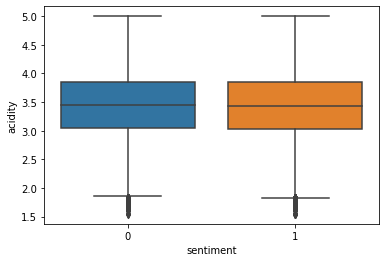

In [7]:
# boxplot for two datasets
sns.boxplot( x='sentiment', y='acidity', data=vivino_df)

#### Testing for difference of means of positive and negative acidity data

In [8]:
# descriptive statistics
print('Acidity')
print(vivino_df['acidity'].describe())
print('')

print('Acidity positive')
print(acidity_pos.describe())
print('')

print('Acidity negative')
print(acidity_neg.describe())
print('')

Acidity
count    143924.000000
mean          3.419806
std           0.633489
min           1.545596
25%           3.040858
50%           3.440961
75%           3.851890
max           5.000000
Name: acidity, dtype: float64

Acidity positive
count    85460.000000
mean         3.410195
std          0.634958
min          1.545596
25%          3.035899
50%          3.439748
75%          3.846253
max          5.000000
Name: acidity, dtype: float64

Acidity negative
count    58464.000000
mean         3.433855
std          0.631078
min          1.545596
25%          3.045226
50%          3.444427
75%          3.856335
max          5.000000
Name: acidity, dtype: float64



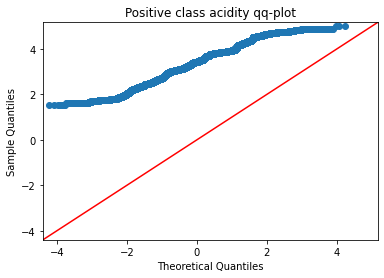

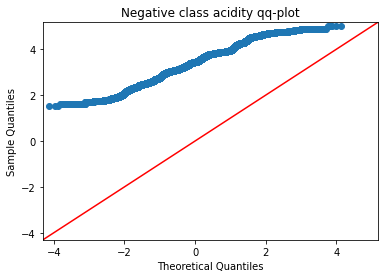

In [9]:
# QQ plots
fig = sm.qqplot(acidity_pos, line='45')
plt.title('Positive class acidity qq-plot')
plt.show()

fig = sm.qqplot(acidity_neg, line='45')
plt.title('Negative class acidity qq-plot')

plt.show()

In [10]:
# KS and Lilliefors tests for normality of data

ks_pos = kstest_normal(acidity_pos)
ks_neg = kstest_normal(acidity_neg)

print('Positive class acidity KS statistic, p-value {}'.format(ks_pos))
print('Negative class acidity KS statistic, p-value {}'.format(ks_neg))

lil_pos = lilliefors(acidity_pos, dist='norm')
lil_neg = lilliefors(acidity_neg, dist='norm')

print('Positive class acidity Lilliefors statistic, p-value {}'.format(lil_pos))
print('Negative class acidity Lilliefors statistic, p-value {}'.format(lil_neg))

Positive class acidity KS statistic, p-value (0.060838788074873196, 0.0009999999999998899)
Negative class acidity KS statistic, p-value (0.05699207584321031, 0.0009999999999998899)
Positive class acidity Lilliefors statistic, p-value (0.060838788074873196, 0.0009999999999998899)
Negative class acidity Lilliefors statistic, p-value (0.05699207584321031, 0.0009999999999998899)


In [11]:
# non parametric mean equality test

stats.mannwhitneyu(acidity_pos, acidity_neg, alternative='less')

MannwhitneyuResult(statistic=2451553838.5, pvalue=8.64137454790743e-10)

Conclusion: according to the nonparametric test (Mann Whitney U test), we rejected the $H_0$ hypothesis about equality of means in favour of the $H_1$ less alternative.

### Intensity

In [12]:
# splitting the intensity data into pos and neg sentiment
intensity_pos = vivino_df[vivino_df['sentiment'] == 1]['intensity'].dropna()
intensity_neg =  vivino_df[vivino_df['sentiment'] == 0]['intensity'].dropna()

print('Number of positive {}'.format(len(intensity_pos)))
print('Number of negative {}'.format(len(intensity_neg)))

Number of positive 85460
Number of negative 58464


<AxesSubplot:xlabel='sentiment', ylabel='intensity'>

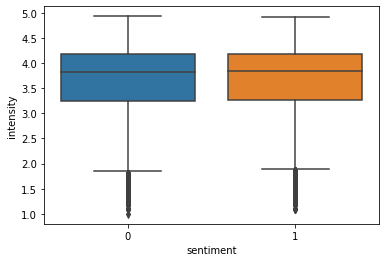

In [13]:
# boxplot for two datasets
sns.boxplot( x='sentiment', y='intensity', data=vivino_df)

#### Testing for difference of means of positive and negative intensity data

In [14]:
# descriptive statistics
print('Intensity')
print(vivino_df['intensity'].describe())
print('')

print('Intensity positive')
print(intensity_pos.describe())
print('')

print('Intensity negative')
print(intensity_neg.describe())

Intensity
count    143924.000000
mean          3.695219
std           0.684291
min           1.000000
25%           3.259041
50%           3.830173
75%           4.179549
max           4.929546
Name: intensity, dtype: float64

Intensity positive
count    85460.000000
mean         3.701294
std          0.677640
min          1.099007
25%          3.266613
50%          3.832497
75%          4.179549
max          4.913208
Name: intensity, dtype: float64

Intensity negative
count    58464.000000
mean         3.686337
std          0.693808
min          1.000000
25%          3.241211
50%          3.827479
75%          4.179549
max          4.929546
Name: intensity, dtype: float64


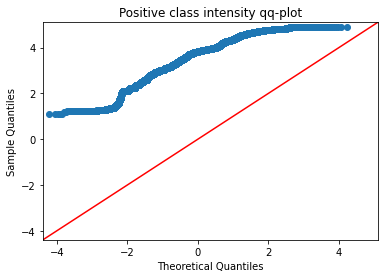

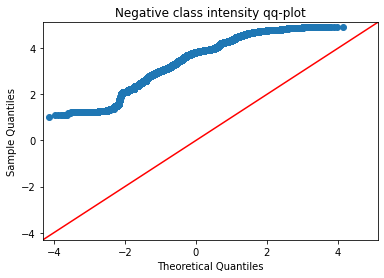

In [15]:
# QQ plots
fig = sm.qqplot(intensity_pos, line='45')
plt.title('Positive class intensity qq-plot')
plt.show()

fig = sm.qqplot(intensity_neg, line='45')
plt.title('Negative class intensity qq-plot')

plt.show()

In [16]:
# KS and Lilliefors tests for normality of data

ks_pos = kstest_normal(intensity_pos)
ks_neg = kstest_normal(intensity_neg)

print('Positive class intensity KS statistic, p-value {}'.format(ks_pos))
print('Negative class intensity KS statistic, p-value {}'.format(ks_neg))

lil_pos = lilliefors(intensity_pos, dist='norm')
lil_neg = lilliefors(intensity_neg, dist='norm')

print('Positive class intensity Lilliefors statistic, p-value {}'.format(lil_pos))
print('Negative class intensity Lilliefors statistic, p-value {}'.format(lil_neg))

Positive class intensity KS statistic, p-value (0.10085135656969196, 0.0009999999999998899)
Negative class intensity KS statistic, p-value (0.10088691174023845, 0.0009999999999998899)
Positive class intensity Lilliefors statistic, p-value (0.10085135656969196, 0.0009999999999998899)
Negative class intensity Lilliefors statistic, p-value (0.10088691174023845, 0.0009999999999998899)


In [17]:
# non parametric mean equality test

print(stats.mannwhitneyu(intensity_pos, intensity_neg, alternative='greater'))

MannwhitneyuResult(statistic=2521598661.0, pvalue=0.0012351615993145195)


Conclusion: according to the nonparametric test (Mann Whitney U test), we rejected the $H_0$ hypothesis about equality of means in favour of the $H_1$ less alternative.

### Sweetness

In [18]:
# splitting the sweetness data into pos and neg sentiment
sweetness_pos = vivino_df[vivino_df['sentiment'] == 1]['sweetness'].dropna()
sweetness_neg =  vivino_df[vivino_df['sentiment'] == 0]['sweetness'].dropna()

print('Number of positive {}'.format(len(sweetness_pos)))
print('Number of negative {}'.format(len(sweetness_neg)))

Number of positive 85460
Number of negative 58464


<AxesSubplot:xlabel='sentiment', ylabel='sweetness'>

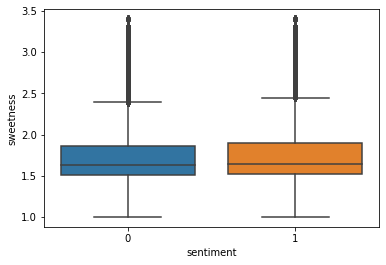

In [19]:
# boxplot for two datasets
sns.boxplot( x='sentiment', y='sweetness', data=vivino_df)

#### Testing for difference of means of positive and negative sweetness data

In [20]:
# descriptive statistics
print('Sweetness')
print(vivino_df['sweetness'].describe())
print('')

print('Intensity positive')
print(sweetness_pos.describe())
print('')

print('Intensity negative')
print(sweetness_neg.describe())
print('')

Sweetness
count    143924.000000
mean          1.754094
std           0.382761
min           1.000000
25%           1.517376
50%           1.639207
75%           1.888312
max           3.399474
Name: sweetness, dtype: float64

Intensity positive
count    85460.000000
mean         1.761068
std          0.386796
min          1.000000
25%          1.521308
50%          1.644739
75%          1.892162
max          3.399474
Name: sweetness, dtype: float64

Intensity negative
count    58464.000000
mean         1.743900
std          0.376555
min          1.000000
25%          1.511211
50%          1.632592
75%          1.865079
max          3.399474
Name: sweetness, dtype: float64



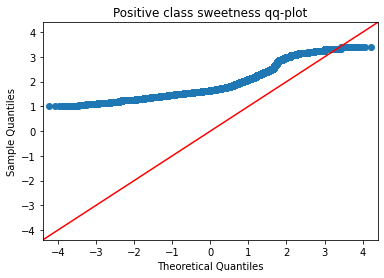

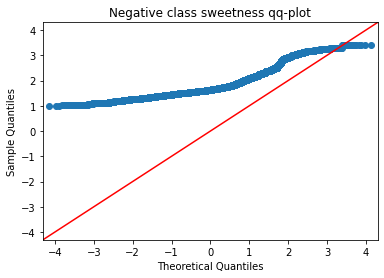

In [21]:
# QQ plots
fig = sm.qqplot(sweetness_pos, line='45')
plt.title('Positive class sweetness qq-plot')
plt.show()

fig = sm.qqplot(sweetness_neg, line='45')
plt.title('Negative class sweetness qq-plot')

plt.show()

In [22]:
# KS and Lilliefors tests for normality of data

ks_pos = kstest_normal(sweetness_pos)
ks_neg = kstest_normal(sweetness_neg)

print('Positive class sweetness KS statistic, p-value {}'.format(ks_pos))
print('Negative class sweetness KS statistic, p-value {}'.format(ks_neg))

lil_pos = lilliefors(sweetness_pos, dist='norm')
lil_neg = lilliefors(sweetness_neg, dist='norm')

print('Positive class sweetness Lilliefors statistic, p-value {}'.format(lil_pos))
print('Negative class sweetness Lilliefors statistic, p-value {}'.format(lil_neg))

Positive class sweetness KS statistic, p-value (0.16168467021873456, 0.0009999999999998899)
Negative class sweetness KS statistic, p-value (0.1535830906832123, 0.0009999999999998899)
Positive class sweetness Lilliefors statistic, p-value (0.16168467021873456, 0.0009999999999998899)
Negative class sweetness Lilliefors statistic, p-value (0.1535830906832123, 0.0009999999999998899)


In [23]:
# non parametric mean equality test

print(stats.mannwhitneyu(sweetness_pos, sweetness_neg, alternative='greater'))

MannwhitneyuResult(statistic=2563988650.5, pvalue=9.244095480353946e-18)


Conclusion: according to the nonparametric test (Mann Whitney U test), we rejected the $H_0$ hypothesis about equality of means in favour of the $H_1$ less alternative.

## Using acidity, intensity and sweetness as predictors for liking or disliking wine

In [6]:
# dropping NaN from the structure dataset for classification purposes
vivino_df_structure = vivino_df[['acidity', 'intensity', 'sweetness', 'sentiment', 'Country', 'Style']].dropna()

# splitting Vivino data in train and test datasets
X_train, X_test, y_train, y_test = train_test_split( vivino_df_structure[['acidity', 'intensity', 'sweetness']], vivino_df_structure['sentiment'] ,test_size=0.3)

### Naive Bayes

In [8]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
    
y_train_predicted = gnb.predict(X_train)
y_test_predicted = gnb.predict(X_test)
    
train_acc = accuracy_score(y_train, y_train_predicted)
test_f1 = f1_score(y_test, y_test_predicted)

print('NB train accuracy: {}'.format(train_acc))
print('NB test f1: {}'.format(test_f1))

NB train accuracy: 0.5917257260834177
NB test f1: 0.7432946825954555


### XGBoost

In [8]:
xgb_train = xgb.DMatrix(X_train, y_train)
xgb_test = xgb.DMatrix(X_test)

In [22]:
param = { #'eta': 0.75,
         'max_depth': 50,
         'objective': 'binary:logitraw'}

xgb_model = xgb.train(param, xgb_train, num_boost_round = 30)

[13:32:07] WARNING: ../src/learner.cc:1205: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
y_test_predicted = xgb_model.predict(xgb_test)
y_test_predicted = np.where(np.array(y_test_predicted) > 0.5, 1, 0)

test_acc = accuracy_score(y_test, y_test_predicted)
test_f1 = f1_score(y_test, y_test_predicted)

print('XGB test accuracy: {}'.format(test_acc))
print('XGB test f1: {}'.format(test_f1))

XGB test accuracy: 0.5031034323034879
XGB test f1: 0.4857998801677651


### SVM

In [10]:
# Linear kernel

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
y_test_predicted = svm_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_predicted)
test_f1 = f1_score(y_test, y_test_predicted)


print('Linear SVM test accuracy: {}'.format(test_acc))
print('Linear SVM test f1: {}'.format(test_f1))



Linear SVM test accuracy: 0.5953263235907175
Linear SVM test f1: 0.746337993409114


In [31]:
# RBF kernel, multiple hyperparameters

Cs = [0.1, 1, 10, 100, 1000]
gammas = [100, 10, 1, 0.1]

results_svm = pd.DataFrame(columns=['C', 'gamma', 'test_accuracy', 'test_f1'])

for C in Cs:
    for gamma in gammas:
        svm_model = SVC(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train, y_train)
        
        y_test_predicted = svm_model.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_predicted)
        test_f1 = f1_score(y_test, y_test_predicted)
        
        print('C: {} gamma: {}'.format(C, gamma))
        
        results_svm = results_svm.append(pd.DataFrame({'C': [C,], 'gamma':[gamma,], 'test_accuracy': [test_acc,], 'test_f1': [test_f1,]}), ignore_index = True)

KeyboardInterrupt: 

In [ ]:
results_svm = results_svm.sort_values(by=['test_accuracy', 'test_f1'], ascending=False)

In [ ]:
results_svm.to_csv('svm_results.csv')

## Random Forest

In [ ]:
max_depths = [2, 3, 4, 5, 10]
n_learners = [50, 75, 100, 125, 150]

results_rf = pd.DataFrame(columns=['n_learners', 'max_depth','test_accuracy', 'test_f1'])

for md in max_depths:
    for n in n_learners:
        rf_clf = RandomForestClassifier(n_estimators=n, max_depth=md)
        rf_clf.fit(X_train, y_train)

        y_test_predicted = rf_clf.predict(X_test)
        rf_test_acc = accuracy_score(y_test, y_test_predicted)
        rf_test_f1 = f1_score(y_test, y_test_predicted)

        results_rf = results_rf.append(pd.DataFrame({'n_learners':[n,], 'max_depth': [md,], 'test_accuracy': [rf_test_acc,], 'test_f1': [rf_test_f1,]}, ), ignore_index=True)

In [ ]:
results_rf.sort_values('test_accuracy', ascending=False).head(10)

# Clustering

### Aim: cluster datapoints with regards to acidity, intensity and sweetness, observe differences between clusters when it comes to those three dimensions and distribution of positive sentiment labels

Plot the features regarding the structure, perform clustering and draw conclusions

In [14]:
vivino_df_structure.head()

,acidity,intensity,sweetness,sentiment,Country,Style
0,2.720392,3.785901,2.034245,1,Argentina,Argentina Malbec
1,2.720392,3.785901,2.034245,1,Argentina,Argentina Malbec
2,2.720392,3.785901,2.034245,0,Argentina,Argentina Malbec
3,2.720392,3.785901,2.034245,1,Argentina,Argentina Malbec
4,2.720392,3.785901,2.034245,1,Argentina,Argentina Malbec


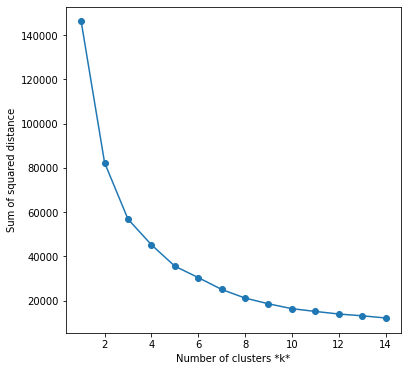

In [16]:
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(vivino_df_structure[['sweetness', 'acidity', 'intensity']])
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [17]:

def d3_plot(coords, cmap, label, title, xlabel, ylabel, zlabel, label_name='cluster'):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    
    fig.patch.set_facecolor('white')
    for l in np.unique(label):
        rows = coords[coords[label_name] == l]
        ax.scatter(rows['acidity'], rows['intensity'], rows['sweetness'], c=cmap[l], s=40)
    # for loop ends
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_zlabel(zlabel, fontsize=14)
    ax.set_title(title)

    ax.legend()
    plt.show()
    
    

cmap = {0: 'red', 1:'green', 2:'blue', 3:'orange', 4:'yellow', 5:'purple', 6:'cyan', 7:'magenta'}
xlabel = "Acidity"
ylabel = "Intensity"
zlabel = "Sweetness"

## 4 clusters

In [18]:
km = KMeans(n_clusters=4)
km.fit(vivino_df_structure[['sweetness', 'acidity', 'intensity']])
vivino_df_structure["cluster_4"] = km.labels_

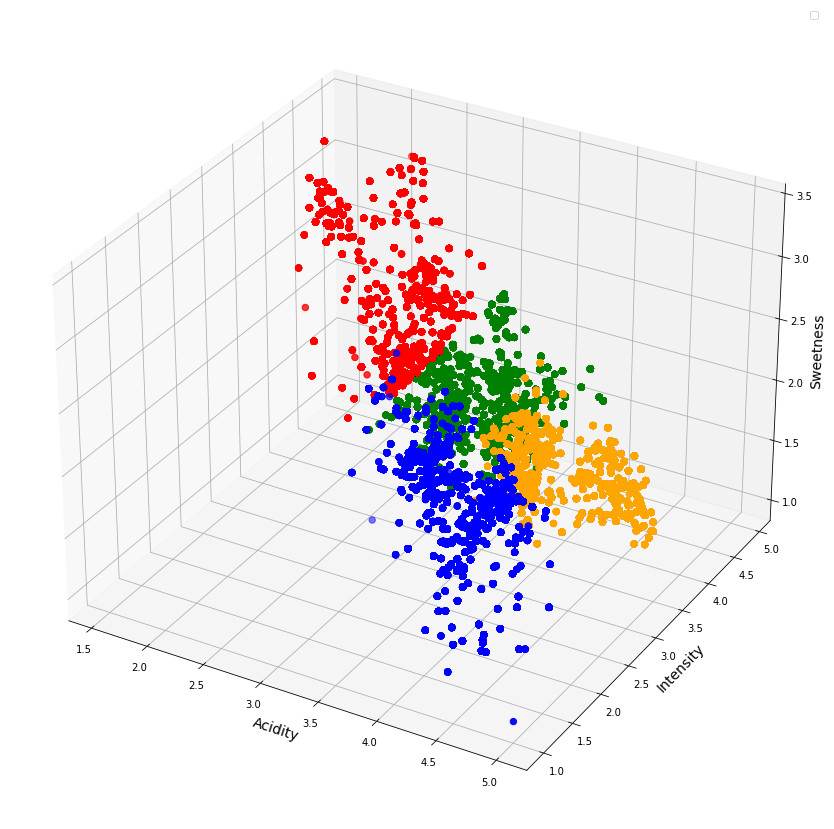

In [19]:
d3_plot(vivino_df_structure, cmap, vivino_df_structure["cluster_4"], '', xlabel, ylabel, zlabel, 'cluster_4')

### Cluster analysis

In [20]:
vivino_df_structure.groupby('cluster_4')[['sweetness', 'acidity', 'intensity', 'sentiment']].mean().sort_values('sentiment', ascending=False)

,sweetness,acidity,intensity,sentiment
cluster_4,,,,
0,2.394848,2.445683,4.127718,0.610737
1,1.732329,3.238459,4.170014,0.595536
2,1.562167,3.655708,2.814810,0.589419
3,1.546369,4.070169,3.790665,0.584542


## 6 clusters

In [21]:
km = KMeans(n_clusters=6)
km.fit(vivino_df_structure[['sweetness', 'acidity', 'intensity']])
vivino_df_structure["cluster_6"] = km.labels_

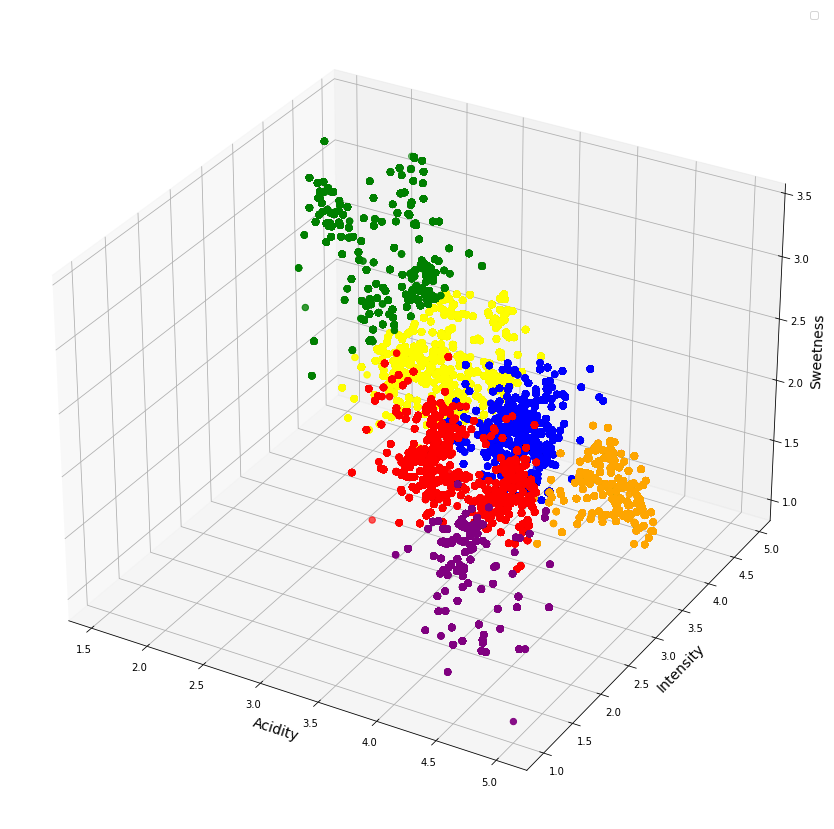

In [22]:
d3_plot(vivino_df_structure, cmap, vivino_df_structure["cluster_6"], '', xlabel, ylabel, zlabel, 'cluster_6')

### Cluster analysis

In [23]:
vivino_df_structure.groupby('cluster_6')[['sweetness', 'acidity', 'intensity', 'sentiment']].mean().sort_values('sentiment', ascending=False)

,sweetness,acidity,intensity,sentiment
cluster_6,,,,
1,2.635830,2.276908,4.259686,0.612264
0,1.603718,3.522872,3.170188,0.598475
2,1.646241,3.576756,4.006977,0.595908
4,1.911386,2.899096,4.218495,0.593235
3,1.451185,4.417887,3.897694,0.579393
5,1.498706,4.000101,2.225011,0.571688


## 8 clusters

In [24]:
km = KMeans(n_clusters=8)
km.fit(vivino_df_structure[['sweetness', 'acidity', 'intensity']])
vivino_df_structure["cluster_8"] = km.labels_

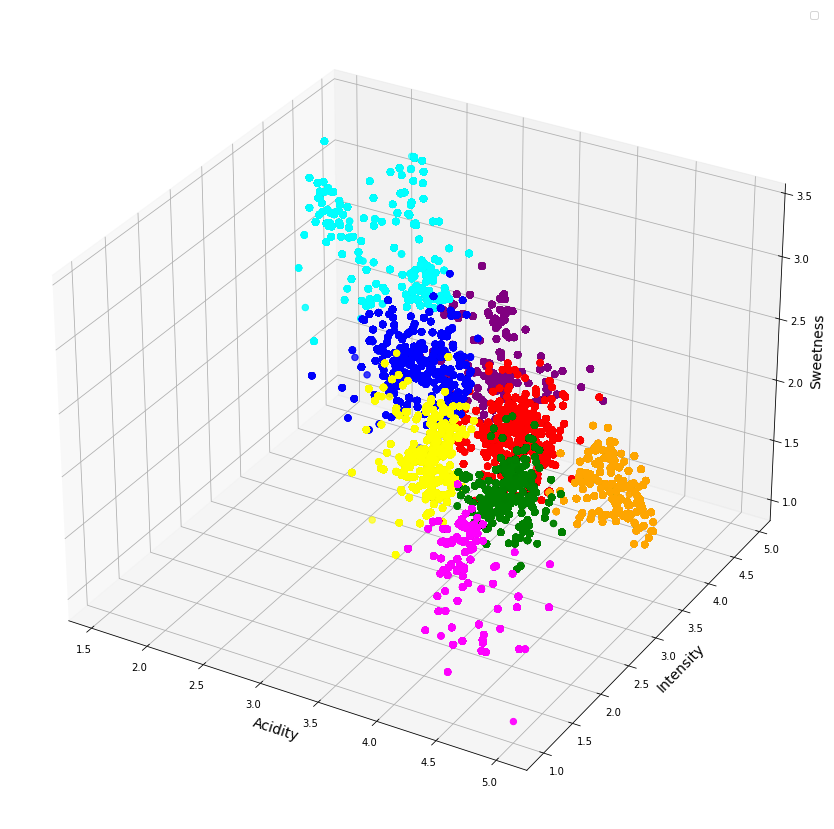

In [25]:
d3_plot(vivino_df_structure, cmap, vivino_df_structure["cluster_8"], '', xlabel, ylabel, zlabel, 'cluster_8')

### Cluster analysis

In [27]:
vivino_df_structure.groupby('cluster_8')[['sweetness', 'acidity', 'intensity', 'sentiment']].mean().sort_values('sentiment', ascending=False)

,sweetness,acidity,intensity,sentiment
cluster_8,,,,
6,2.658979,2.270405,4.312816,0.614642
2,1.988611,2.759273,3.872657,0.604580
4,1.662173,3.208363,3.155483,0.600532
0,1.637318,3.569347,3.982639,0.593202
1,1.536831,3.875276,3.197716,0.592307
5,1.837192,3.109567,4.600231,0.585875
3,1.453383,4.428045,3.914244,0.582087
7,1.499956,3.990032,2.190628,0.572524


# Correlation testing

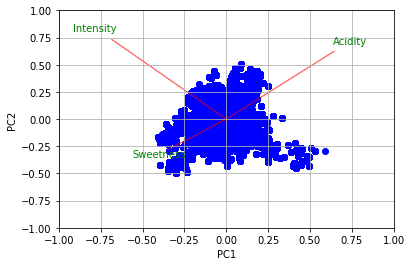

In [28]:
pca = PCA()
x_new = pca.fit_transform(vivino_df_structure[['sweetness', 'acidity', 'intensity']])

def myplot(score,coeff,labels=['Sweetness','Acidity', 'Intensity'], y=['blue',]):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
print(spearmanr(vivino_df_structure['sweetness'],vivino_df_structure['acidity']))
print(spearmanr(vivino_df_structure['intensity'],vivino_df_structure['acidity']))
print(spearmanr(vivino_df_structure['intensity'],vivino_df_structure['sweetness']))

# Wine preferences by wine origin

In [29]:
vivino_df_structure.groupby('Country')[['sweetness', 'acidity', 'intensity', 'sentiment']].mean().sort_values('sentiment', ascending=False)

,sweetness,acidity,intensity,sentiment
Country,,,,
Israel,1.860978,3.009959,4.324479,0.652542
Argentina,1.822238,3.037216,3.619836,0.634655
USA,1.776677,3.150139,3.675932,0.602506
New Zealand,1.595555,3.821830,2.632129,0.602253
Sydafrika,1.706741,3.429345,4.089264,0.598297
Italien,1.857987,3.291969,3.616558,0.595952
Tyskland,1.452133,4.281991,1.403384,0.594747
Portugal,1.775654,3.093212,4.400059,0.590336
Spanien,1.730153,3.453746,3.972523,0.590093


In [30]:
vivino_df_structure.groupby("Country")["acidity"].count().sort_values()

Country
Uruguay           93
Israel           236
Tyskland         533
Österrike        619
Portugal         952
Chile           1470
New Zealand     4083
USA             5268
Sydafrika       5753
Australien      6109
Argentina       6758
Spanien        12032
Frankrike      35043
Italien        64975
Name: acidity, dtype: int64

# Exploring wine styles

In [31]:
vivino_df.groupby('Style')['Wine ID'].nunique().sort_values(ascending=False).head(21)

Style
Södra Italien Röda                      141
Toskanska röda                          122
Norra Italien Röda                      104
Chianti                                  73
Södra Rhône Röda                         61
Centrala Italien Röda                    51
Södra Italien Primitivo                  44
Italiensk Barbera                        43
Italien Nebbiolo                         41
Barolo                                   38
Ribera del Duero                         37
Saint-Émilion                            33
Bordeaux Röda                            27
Languedoc-Roussillon Röda                27
Argentina Malbec                         27
Australien Shiraz                        26
Rioja Röda                               26
Brunello                                 26
Médoc                                    23
Södra Rhône Châteauneuf-du-Pape Röda     22
Ripasso                                  22
Name: Wine ID, dtype: int64

In [33]:
vv = vivino_df[['Style', 'sentiment']].groupby('Style').mean().sort_values('sentiment', ascending=False).head(21)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


(0.6, 0.8)

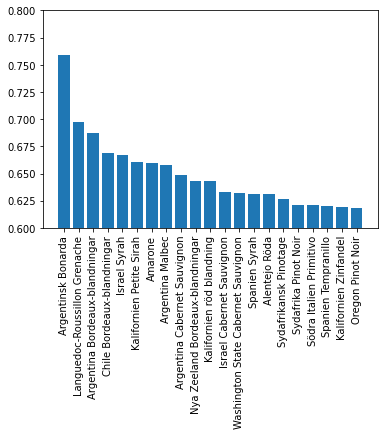

In [34]:
fig, ax = plt.subplots()
ax.bar(vv.index, vv['sentiment'], width=0.8, bottom=None, align='center', data=None)
ax.set_xticklabels(vv.index, rotation=90)
plt.ylim([0.6,0.8])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


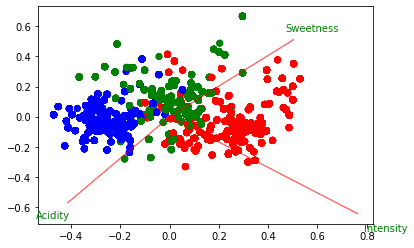

In [35]:
vivino_common_styles = vivino_df_structure[vivino_df['Style'].isin(['Södra Italien Röda','Toskanska röda','Norra Italien Röda'])]
vivino_common_styles.head()
x_new = pca.fit_transform(vivino_common_styles[['sweetness', 'acidity', 'intensity']])
colors = {'Södra Italien Röda':'red','Toskanska röda':'blue', 'Norra Italien Röda':'green'}
style_colors = [colors[x] for x in vivino_common_styles['Style']]
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), y=style_colors)

In [ ]:
vivino_common_styles = vivino_df_structure[vivino_df['Style'].isin(['Argentinsk Bonarda','Languedoc-Roussillon Grenache','Spanien Cabernet Sauvignon', 'Norra Portugal Röda'])]
vivino_common_styles.head()
x_new = pca.fit_transform(vivino_common_styles[['sweetness', 'acidity', 'intensity']])
colors = {'Argentinsk Bonarda':'blue', 'Languedoc-Roussillon Grenache':'green', 'Spanien Cabernet Sauvignon':'orange', 'Norra Portugal Röda':'red'}
style_colors = [colors[x] for x in vivino_common_styles['Style']]
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), y=style_colors)
plt.title("")

markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colors.values()]
plt.legend(markers, colors.keys(), numpoints=1, loc='upper right')
plt.xlabel("PC{}".format(1) + "  (" + str(round(pca.explained_variance_ratio_[0]*100,2)) + "%)")
plt.ylabel("PC{}".format(2) + "  (" + str(round(pca.explained_variance_ratio_[1]*100,2))+ "%)")